# 7. Decision Trees and Ensemble Techniques

## 7.1 Hiearchical Clustering

Hierarchical clustering is an unsupervised learning task whose goal is to build a
hierarchy of data groups. The hierarchy can be built from
the “bottom-up”. In this case each data instance starts in its
own cluster, and we successively merge these clusters as we
go up in the levels of the hierarchy. This is known as
agglomerative clustering. In contrast, divisive clustering
takes the opposite approach, starting with all data instances
and performing splits as we go down the levels of the
hierarchy. The results of hierarchical clustering are presented in a tree-like structure called a dendrogram. Clustering relies on the existence of a similarity
measure among data instances. In a dendrogram, data
points are joined together from the most similar (closest) to
the most different (further apart). In hierarchical clustering we only need one thing: A similarity measure among groups of data points.

Let us take a look at the agglomerative clustering approach, where our starting point is a situation where each of our N
data instances is on their own cluster. Given the similarity
measure d(xi, xj), we iteratively merge the two closest
groups, repeating until all data instances end up in a single cluster. The point at which two clusters are joined up is
called a node. At each of the nodes of the resulting tree we
are effectively segmenting our data in a sequential manner. It is easy to see that the similarity among merged groupings
decreases monotonically at every node created by
agglomerative clustering. The more dissimilar two clusters
are, the more distant they are. This is actually depicted in a
dendrogram: The height of each branch, or clade, tells us
how similar or different the groupings are from each other,
the greater the height, the greater their dissimilarity.

At the start of the agglomerative process, finding similar
data points is straightforward as we are comparing individual data points. However, once we have more than
one instance per cluster we need to define what we mean by
similarity among groups or clusters. Given two clusters F
and G, we have a few choices: 1. Single linkage: We define the similarity by the closest
instance.
2. Complete linkage: The similarity is given by the farthest Some similarity measures used in
hierarchical clustering. 
3. Group average: The similarity is given by the mean
similarity between F and G.

Another alternative for cluster merging is the so-called Ward
method based on an analysis of variance (ANOVA). approach. In this method, at each stage two clusters would merge when they provide the smallest increase in the
combined error sum of squares from one-way univariate
ANOVAs that may be performed for each feature. Cross validation may provide some clues as to
whether the clusters we obtain may actually make sense.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
X_dist = pdist(X)
X_link = linkage(X,method='ward')
from scipy.cluster.hierarchy import cophenet
coph_cor,coph_dist = cophenet(X_link,X_dist)
print(coph_cor)

0.8728283153305715


In [7]:
print(X_link[0])

[101. 142.   0.   2.]


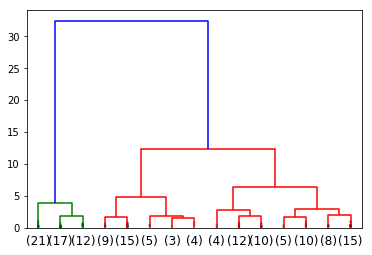

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
dendrogram(X_link,truncate_mode='lastp',p=15,show_contracted=True)
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster
max_d = 9
clusters = fcluster(X_link,max_d,criterion='distance')

In [20]:
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


In [23]:
from scipy.cluster.hierarchy import inconsistent
depth = 6
incons_measure = inconsistent(X_link,depth)
clusters_incons = fcluster(X_link,t=8,criterion = "inconsistent",depth=15)
print(clusters_incons)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 7.2 Decision Trees

A decision tree is an algorithm described as non-parametrical because it does not
require us to make any assumptions about parameters or
distributions before starting our classification task. It is also
a hierarchical technique: The model is built in such a way
that a sequence of ordered decisions about the values of the data features results in assigning a class label to any given
data instance. The tree structure consists of nodes and edges, where the nodes represent
the test conditions or questions we need to consider for
classifying our data. The edges represent the answers or
outcomes to the questions we are asking.

We have a root node which is the node that
has no incoming edges, and two or more outgoing edges.
An internal node has one incoming edge and two or more  outgoing ones: Internal nodes represent test conditions
at every given level. Finally a leaf node has one incoming
edge an no outgoing ones; leaf nodes correspond to class
labels, as there are no further outcomes.

In [25]:
import pandas as pd
titanic = pd.read_csv('Data/train.csv')
titanic = titanic.drop(['Ticket','Cabin'],axis=1)
titanic = titanic.dropna()

In [28]:
Pclas_pct = pd.crosstab(titanic.Pclass.astype('category'),titanic.Survived.astype('category'),margins=True)
Pclas_pct['Percent'] = Pclas_pct[1]/(Pclas_pct[0] + Pclas_pct[1])

In [31]:
Pclas_pct

Survived,0,1,All,Percent
Pclass,,,,
1,64,120,184,0.652174
2,90,83,173,0.479769
3,270,85,355,0.239437
All,424,288,712,0.404494


In [32]:
Sex_pct = pd.crosstab(titanic.Sex.astype('category'),titanic.Survived.astype('category'),margins=True)
Sex_pct['Percent'] = Sex_pct[1]/(Sex_pct[0] + Sex_pct[1])

In [33]:
Sex_pct

Survived,0,1,All,Percent
Sex,,,,
female,64,195,259,0.752896
male,360,93,453,0.205298
All,424,288,712,0.404494


In [34]:
titanic = pd.concat([titanic,pd.get_dummies(titanic['Sex'])],axis=1)

In [37]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,0,1


In [40]:
# Use grid to determine best values of the maximum depth and minimum number of samples
X = titanic[['Pclass','Age','female']]
Y = titanic['Survived']
import sklearn.model_selection as ms
X_Train,XTest,YTrain,YTest = ms.train_test_split(X,Y,test_size=0.3,random_state=1)

In [42]:
import numpy as np
depth_val = np.arange(2,11)
leaf_val = np.arange(1,31,step=9)
from sklearn import tree
grid_s = [{'max_depth':depth_val,'min_samples_leaf':leaf_val}]
model = tree.DecisionTreeClassifier(criterion='entropy')

In [43]:
model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
from sklearn.model_selection import GridSearchCV
cv_tree = GridSearchCV(estimator=model,param_grid=grid_s,cv=ms.KFold(n_splits=10))
cv_tree.fit(X_Train,YTrain)
best_depth = cv_tree.best_params_['max_depth']
best_min_samples = cv_tree.best_params_['min_samples_leaf']

In [46]:
best_depth

3

In [47]:
best_min_samples

1

In [48]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,min_samples_leaf=best_min_samples)
TitanicTree = model.fit(X_Train,YTrain)
survive_pred = TitanicTree.predict(XTest)
survive_proba = TitanicTree.predict_proba(XTest)

In [49]:
survive_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [51]:
survive_proba[1:10]

array([[0.46296296, 0.53703704],
       [0.87982833, 0.12017167],
       [0.04761905, 0.95238095],
       [0.04761905, 0.95238095],
       [0.87982833, 0.12017167],
       [0.46296296, 0.53703704],
       [0.46296296, 0.53703704],
       [0.87982833, 0.12017167],
       [0.87982833, 0.12017167]])

In [52]:
from sklearn import metrics
metrics.confusion_matrix(YTest,survive_pred)

array([[104,  22],
       [ 23,  65]])

In [53]:
print(TitanicTree.score(XTest,YTest))

0.7897196261682243


In [56]:
tree.export_graphviz(TitanicTree,max_depth=3,feature_names=X.columns,class_names=['Dead','Survived'],out_file='TitanicTree.dot')

In [57]:
titanic_test = pd.read_csv('Data/test.csv')
titanic_test = titanic_test.drop(['Ticket','Cabin'],axis=1)
titanic_test = titanic_test.dropna()
titanic_test = pd.concat([titanic_test,pd.get_dummies(titanic_test['Sex'])],axis=1)
X_holdout = titanic_test[['Pclass','Age','female']]
survive_holdout = TitanicTree.predict(X_holdout)

In [59]:
X_holdout.head()

,Pclass,Age,female
0,3,34.5,0
1,3,47.0,1
2,2,62.0,0
3,3,27.0,0
4,3,22.0,1


In [60]:
survive_holdout

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

## 7.3 Ensemble Techniques

When combining classifiers in machine learning. We call these
combinations ensemble techniques. In that respect, an
ensemble is a set of individually trained base classifiers such as decision trees, whose predictions are combined to
determine the class of unseen data. As in the example of the
ox investigated by Galton, the results obtained from an
ensemble are generally more accurate than those of the
individual classifiers.

Let us consider the advantages that are provided by an
ensemble classifier in terms of a supervised learning task.
We are interested in making accurate predictions of the
true class of new data by learning the classifier h. If our An ensemble classifier can help by
averaging out the predictions of
the individual base learners. training data is small, the base classifier on its own will find
it difficult to converge to h. An ensemble classifier can help
by “averaging out” the predictions of the individual base
classifiers, improving convergence.

Given an initial training dataset, we need to build
a set of base classifiers. Each of these n classifiers need to be
trained with appropriate data. A way to do this is shown
diagrammatically in Figure 7.8, where the initial training data is used to create multiple datasets according to a given
sampling distribution. This distribution determines how
likely we are to select a particular record for training. Each
of these datasets is used to train weak learners to predict the
class of unseen data, and finally the models are aggregated.

### 7.3.1 Bagging

Bagging stands for bootstrap aggregation and it
is an ensemble technique that involves the manipulation of
the training dataset by resampling. Given an initial training dataset with N records, in bagging we create multiple
training datasets of size N, by sampling uniformly with
replacement. We build classifiers on each bootstrap sample and take a
majority vote across the classifiers. Since some of the newly created datasets may contain repeated instances of the data,
as well as missing some records altogether, we end up with
a situation where some classifiers will have an error rate
higher than a classifier that uses all the raw data. The increased accuracy from bagging comes from the
reduction in the variance of the individual classifier,
improving therefore our generalisation error. If the classifiers are stable, the error incurred comes mainly from
their bias and bagging may not be effective. Since we are
resampling the data with replacement, bagging does not
focus on particular data instances of the training data. This
means that we are less prone to overfitting.

### 7.3.2 Boosting

Boosting can be described as an iterative
methodology that adapts the sampling of the data in order
to concentrate on records that have been misclassified in
previous iterations. In the initial iteration we start with a uniform distribution We start in the same way we did
for bagging. assigning equal weights to our N records. At the end of the
first round we change the weights to emphasise those
records that were misclassified. In that way, boosting
produces a series of classifiers whose inputs are chosen based on the performance of the previous family of
classifiers in the series. The final prediction of the series is
computed by a weighted vote, depending on the training
errors of the individual base classifiers. Boosting is aimed at building, with each iteration, classifiers
that are better at predicting the label of a data instance than
the classifiers in the previous iteration. The sampling is done with replacement and we may encounter situations
were some particular records do not show in a given
training subset. This is not a problem as these overlooked
records are more likely to be misclassified and as a result 
they will be given a higher weight in later iterations, forcing
the ensemble to correct for these mistakes. We can see that
on each iteration, the base classifiers will concentrate on
records that are harder and harder to classify, facing more
difficult learning tasks as the task progresses.

### 7.3.3 Random Forests

A single tree provides a good shade, but the canopy of a group of trees is difficult to beat. If we grow a group
of various decision trees as our base classifiers, and enable
their growth to use a random effect we end up with a
random forest10. We have seen that bagging produces better results than a single base classifier. If the base classifier is
for instance a decision tree, the various trees we generate
with bagging have different predictions because they use
different training sets. If we were to introduce changes in the way our trees are
grown, for example by randomly selecting not only the
data instances that are included in each subset, but also
by randomly selecting the features to use, we can get base
classifiers that are uncorrelated with each other. In effect,
random forests add a layer of randomness to bagging with
decision trees: On top of growing each tree using each bootstrap sample, in a random forest each node of the
tree is split among a subset of randomly chosen features.
The result is a classifier that performs very well and is
robust to overfitting. A random forest algorithm is very
straightforward to understand as it only has two parameters:
1) the number of features in the random subset at each node, and 2) the number of trees in the forest. The simplest
forest we can grow consists of selecting at each node a small
number of features to perform the split. We then simply
allow the trees to grow to maximum size without pruning.
This methodology is known as Forest-RI or Random Input

### 7.3.4 Stacking and Blending

A way
to combine multiple base classifiers of different kind, known
as stacked generalisation, has been proposed by Wolpert. Some of the steps applied in stacked generalisation are the same as those in cross-validation: For a 2-fold case, we need to split our training data into two disjoint parts. We first  train the base classifiers on the first part, and test them on the second one. We use the predictions from the last step as
inputs for training a higher level learner.

An alternative name for stacking is blending and the word  was made popular by the winners of the famous Netflix
Prize Competition to improve the accuracy of
recommendations provided by Netflix, based on customer
film preferences13. Sometimes a distinction between the two is introduced: In blending we create a small holdout set out
of the training set, and the stacker model is trained on the
holdout set. In general, blending is a simpler methodology
than stacking, but less data is actually used. Please note that
the stacker may overfit to the holdout set.

In [66]:
titanic = pd.read_csv('Data/train.csv')
titanic = titanic.drop(['Ticket','Cabin'],axis=1)
titanic = titanic.dropna()
titanic = pd.concat([titanic,pd.get_dummies(titanic['Sex'])],axis=1)

In [67]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,0,1


In [68]:
import sklearn.model_selection as ms
X = titanic[['Pclass','Age','female','SibSp','Parch','Fare']]
Y = titanic['Survived']
X_Train,XTest,YTrain,YTest = ms.train_test_split(X,Y,test_size=0.2,random_state=42)

In [72]:
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.forest import (RandomForestClassifier,ExtraTreesClassifier)

In [80]:
n_estimators = 100
models = [DecisionTreeClassifier(max_depth=3),BaggingClassifier(n_estimators=n_estimators),RandomForestClassifier(n_estimators=n_estimators),ExtraTreesClassifier(n_estimators=n_estimators),AdaBoostClassifier(n_estimators=n_estimators)]
model_title = ['decisiontree','bagging','randomforest','extratrees','adaboost']
surv_preds,surv_probs,scores,fprs,tprs,thres=([]for i in range(6))

In [91]:
for i,model in enumerate(models):
    #print(model_title[i])
    clf = model.fit(X_Train,YTrain)
    surv_preds.append(model.predict(XTest))
    surv_probs.append(model.predict_proba(XTest))
    scores.append(model.score(XTest,YTest))

    fpr,tpr,thresholds = roc_curve(YTest,surv_probs[i][:,1])
    fprs.append(fpr)
    fprs.append(tpr)
    thres.append(thresholds)


In [96]:
for i,score in enumerate(scores):
    print(model_title[i],score)

decisiontree 0.7482517482517482
bagging 0.7342657342657343
randomforest 0.7692307692307693
extratrees 0.7622377622377622
adaboost 0.8111888111888111


IndexError: list index out of range